# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.utils.extmath import cartesian
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

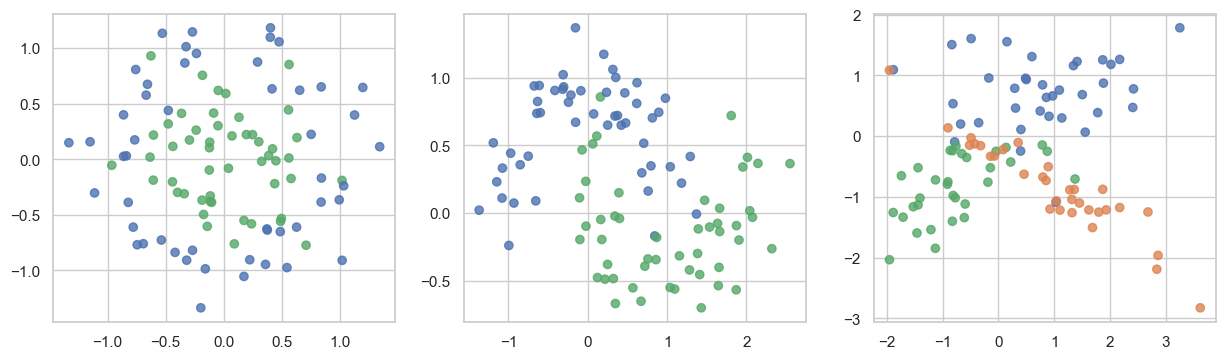

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [6]:
def make_trees(X, y, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=228, shuffle=True, stratify=y)
    tree = DecisionTreeClassifier().fit(X_train, y_train)
    plot_surface(tree, X_test, y_test)
    print(f'In {i + 1} dataset train accuracy is {accuracy_score(y_train, tree.predict(X_train))} and test accuracy is {accuracy_score(y_test, tree.predict(X_test))}')

In 1 dataset train accuracy is 1.0 and test accuracy is 0.8
In 2 dataset train accuracy is 1.0 and test accuracy is 0.9
In 3 dataset train accuracy is 1.0 and test accuracy is 0.8


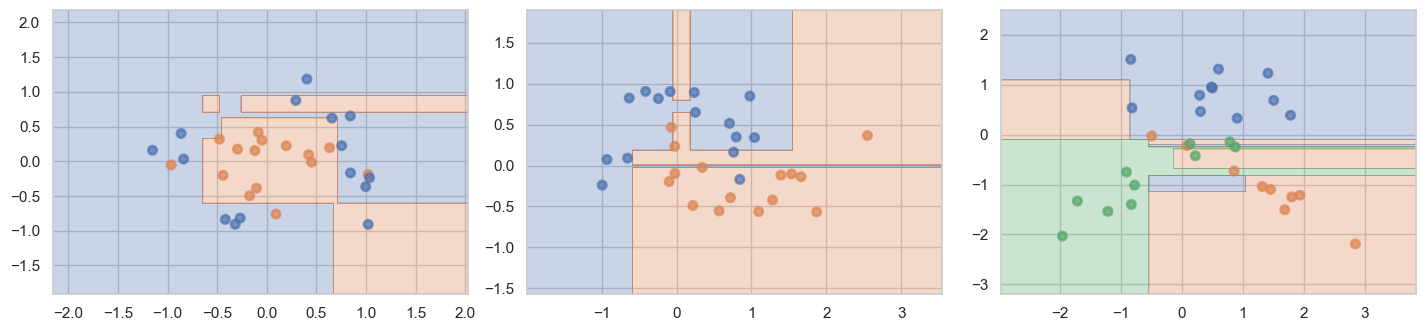

In [7]:
plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    make_trees(datasets[i][0], datasets[i][1], i)

__Ответ:__ судя по графикам(очень много тонких разделяющих плоскостей и пустых областей) и значениям accuracy(на обучающих данных 1, на тестовых значительно меньше), деревья точно переобучились.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
max_depth_list = np.arange(1, 8)
min_samples_leaf_list = np.arange(1, 5)


def trees_reg(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=228, shuffle=True, stratify=y)
    i = 0
    for max_depth, min_samples_leaf in cartesian((max_depth_list, min_samples_leaf_list)):
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
        plt.subplot(len(max_depth_list), len(min_samples_leaf_list), i + 1).set_title(f'max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}')
        plot_surface(tree, X, y)
        i += 1

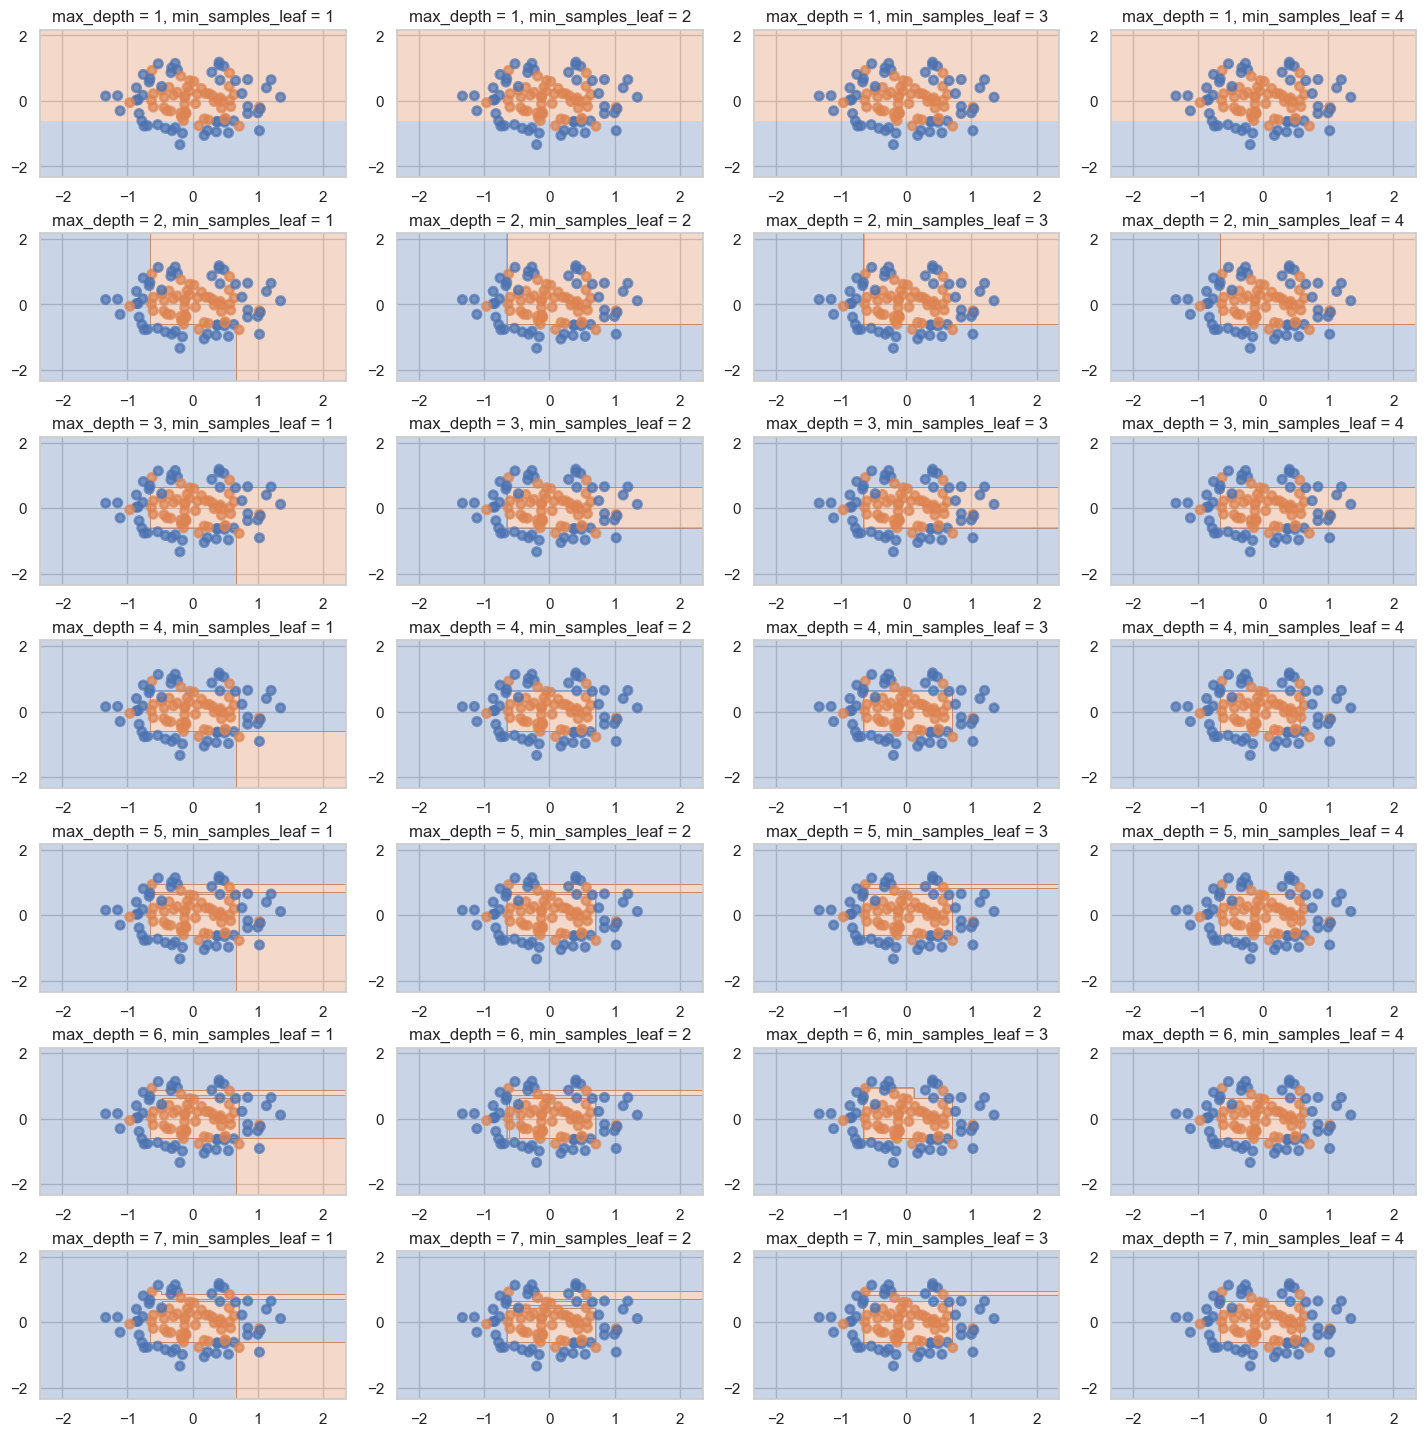

In [9]:
plt.figure(figsize=(15, 15))
trees_reg(datasets[0][0], datasets[0][1])

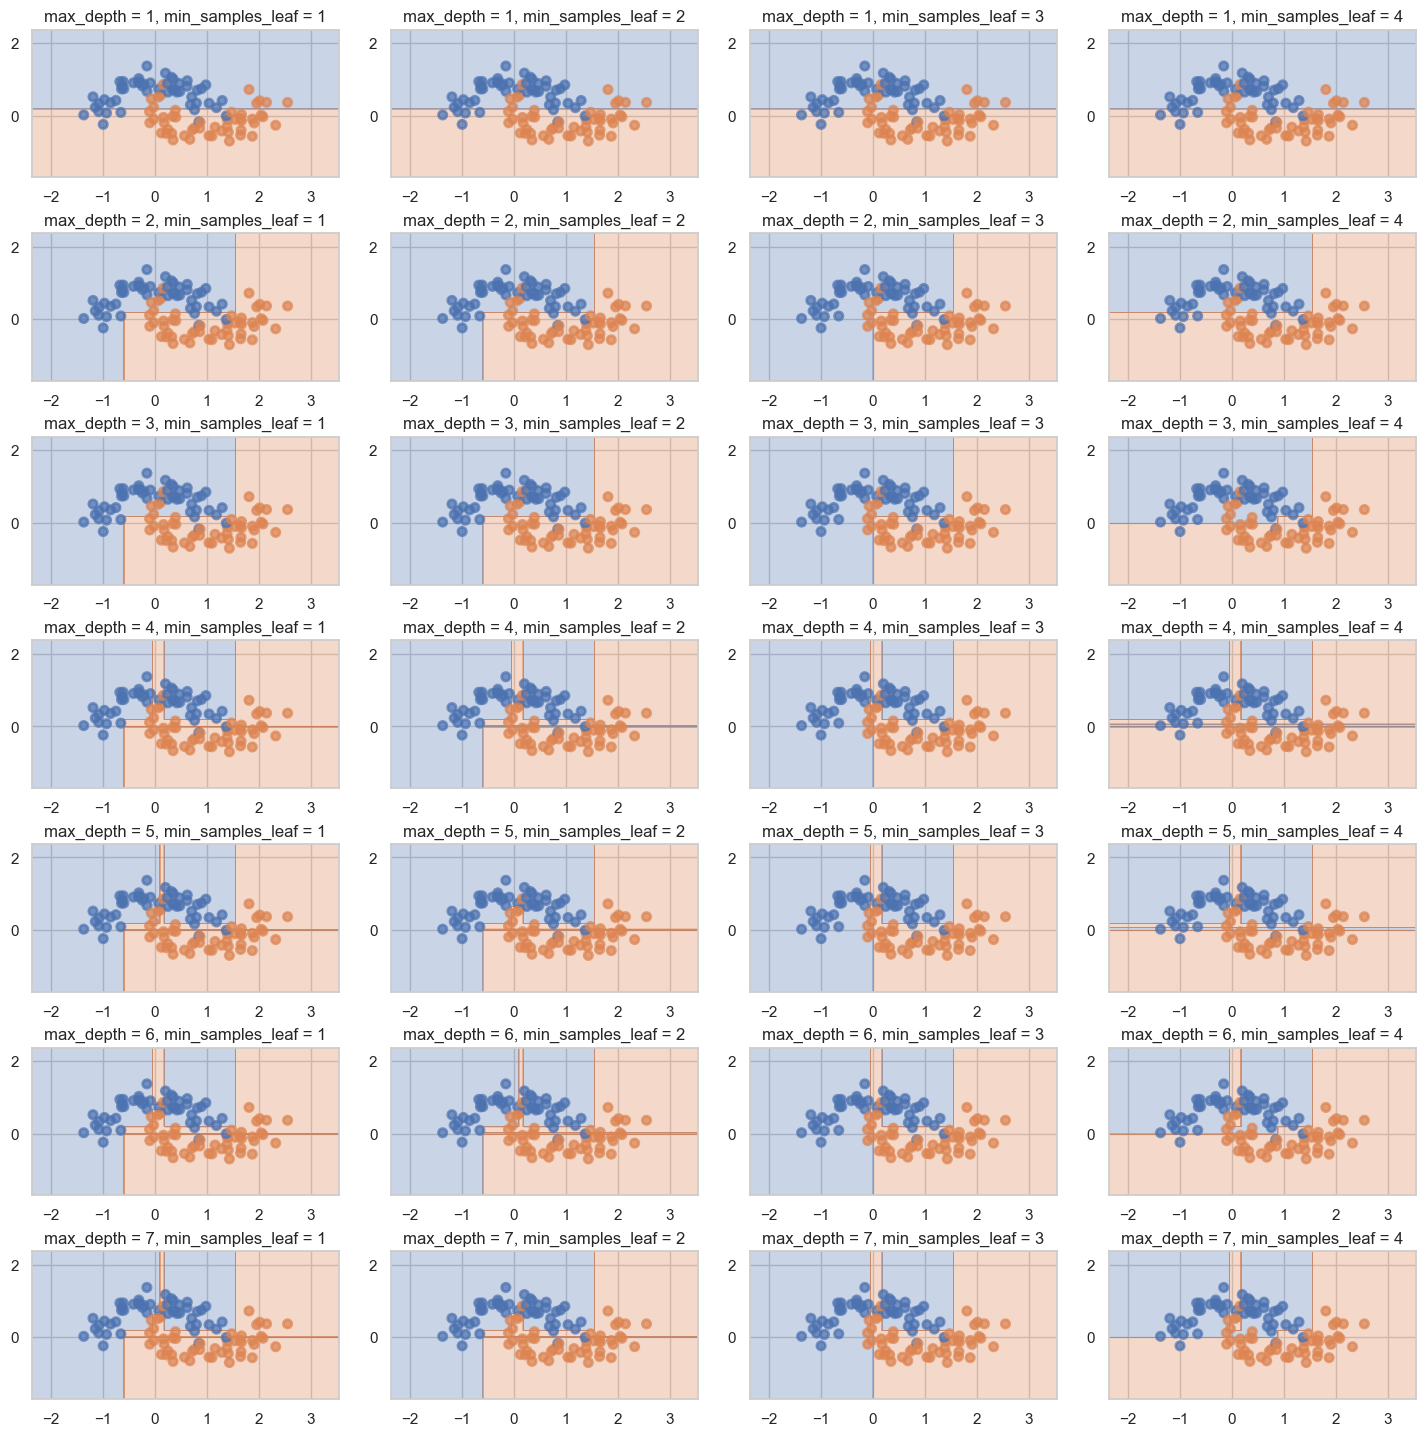

In [10]:
plt.figure(figsize=(15, 15))
trees_reg(datasets[1][0], datasets[1][1])

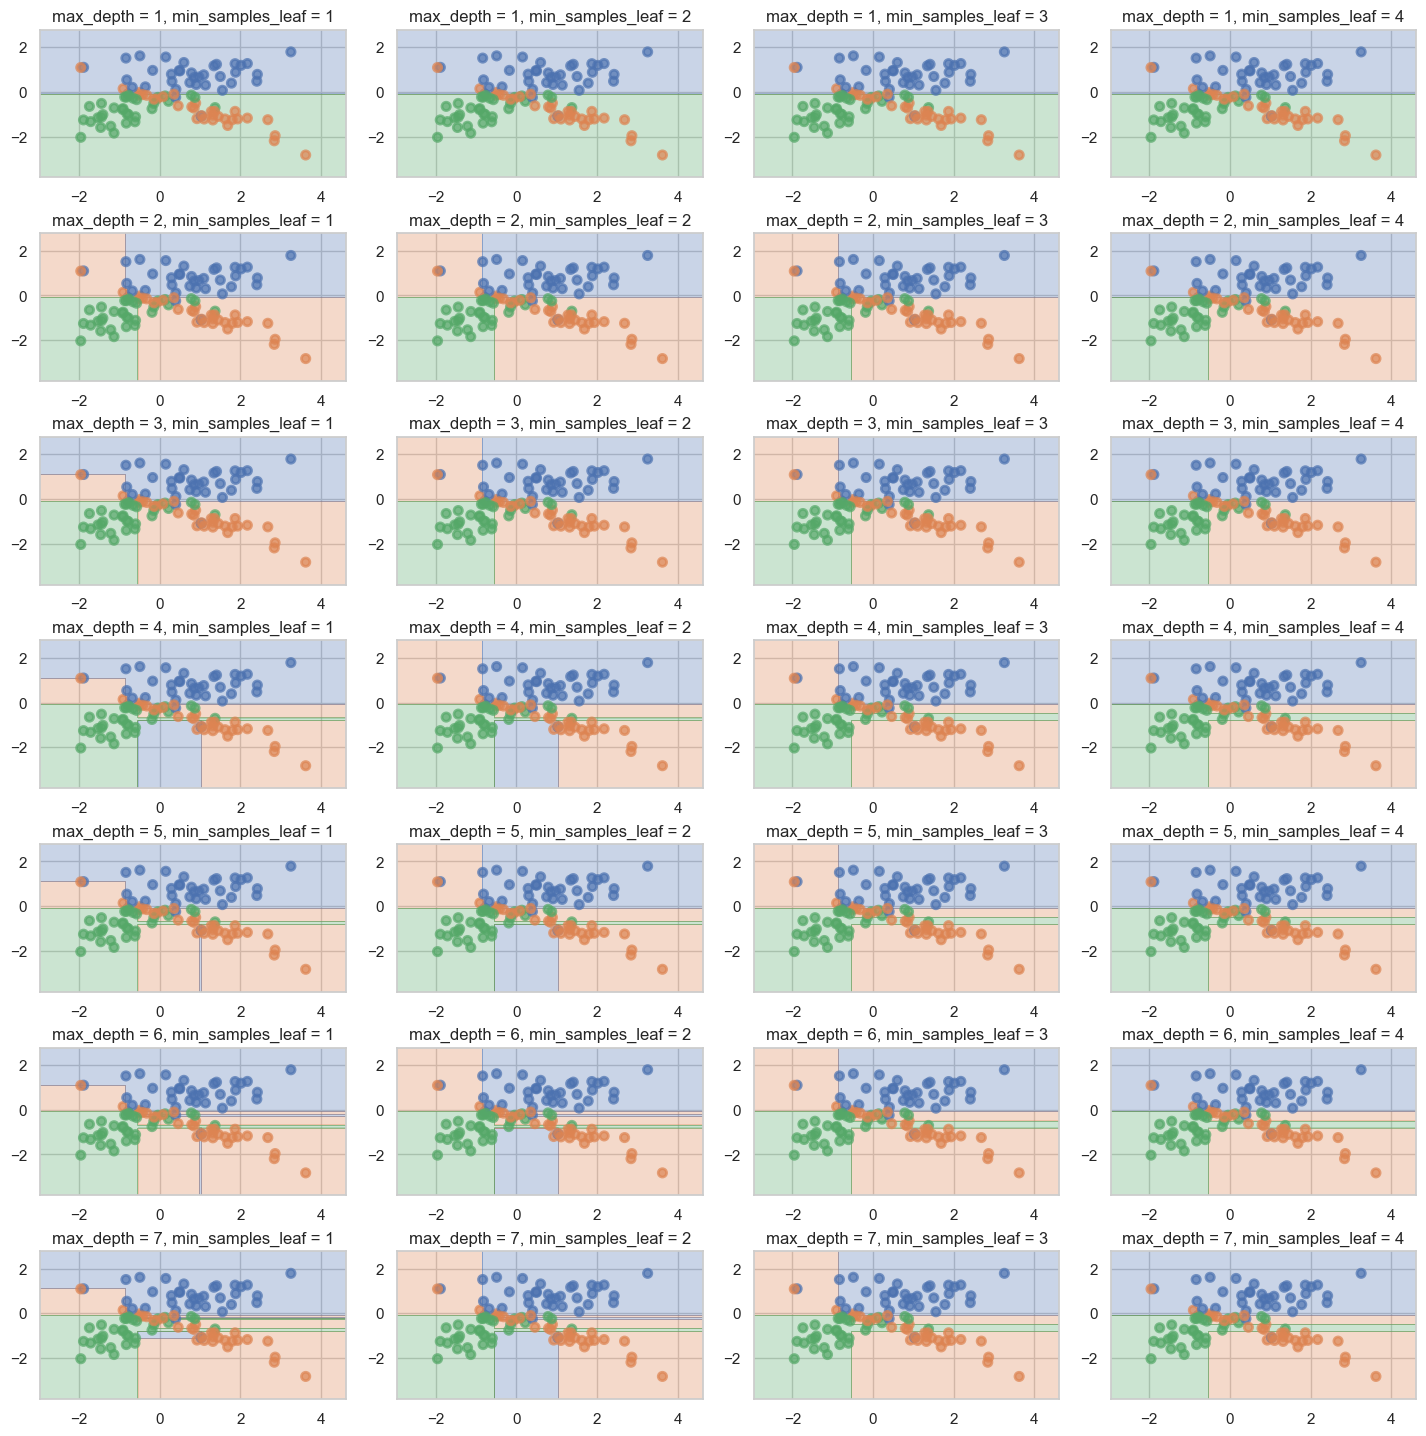

In [11]:
plt.figure(figsize=(15, 15))
trees_reg(datasets[2][0], datasets[2][1])

__Ответ:__ 
- При увеличении глубины дерево переобучается, потому что слишком подстраивается по точки. На первом датасете лучшая глубина имхо 4, на остальных 2-3. Происходит это из-за того, что круговые данные сложно разбить прямой, надо нечто чуть сложнее.
- При увеличении минимального количество точек в листе дерево начинает переобучаться меньше. Заметить это можно по тонким разделяющим плоскостям(признак переобучения). Вроде как на всех датасетах это параметр работает примерно одинаково.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

iadrobyshevskiy

https://contest.yandex.ru/contest/56884/run-report/100228993/

https://contest.yandex.ru/contest/56884/run-report/100229244/

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


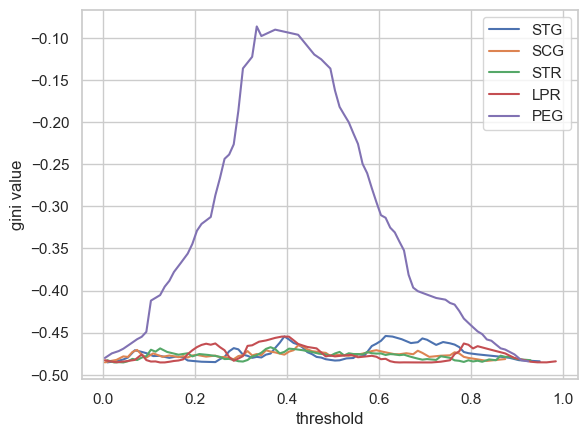

In [13]:
from hw5code import find_best_split

df = pd.read_csv('students.csv')
for i in range(5):
    threshold, ginis, _, _ = find_best_split(df[df.columns[i]], df['UNS'])
    plt.plot(threshold, ginis)
    plt.legend(labels=df.columns[:-1])
    plt.xlabel('threshold')
    plt.ylabel('gini value')

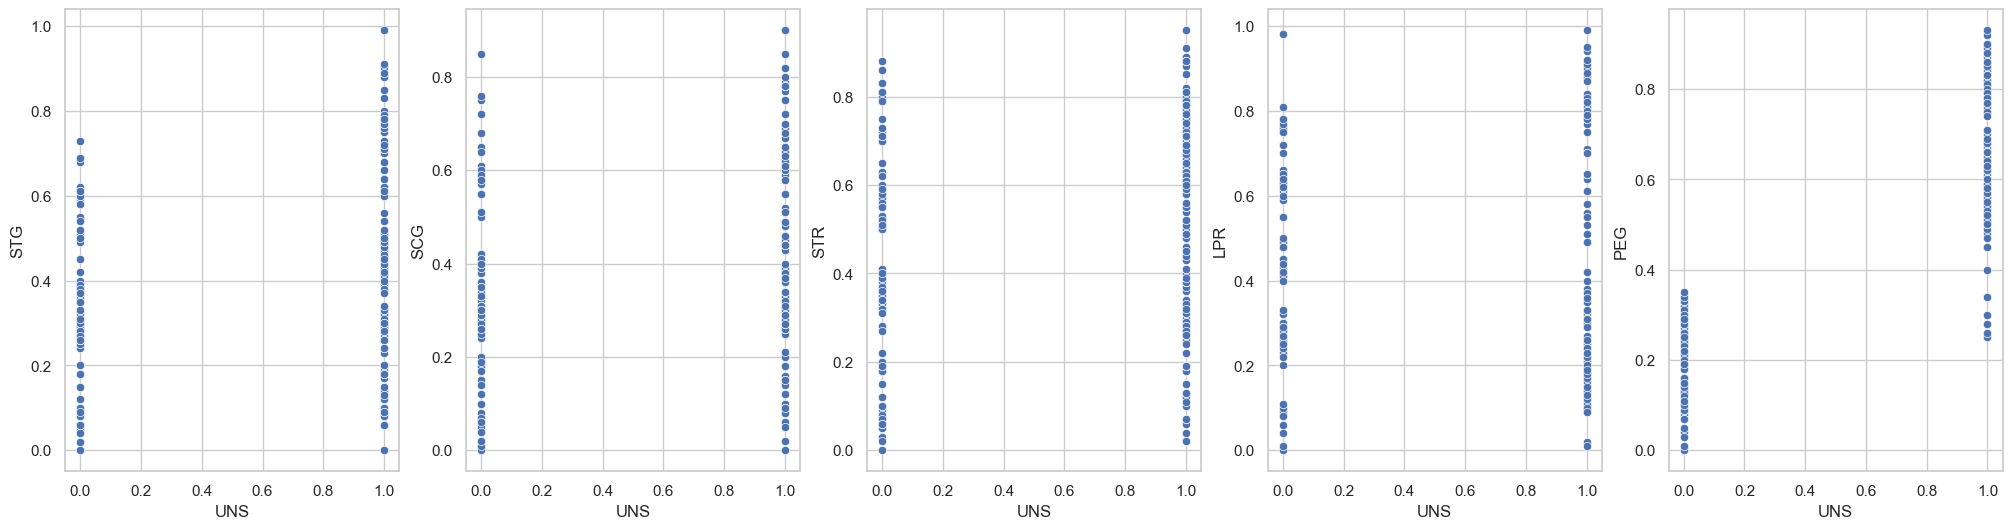

In [14]:
plt.figure(figsize=(25,6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    sns.scatterplot(x=df['UNS'], y=df[df.columns[i]])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** разделять выборку следует по признаку PEG. На графиках со всеми значениями индекса Джини именно этот признак принимает наибольшее значение. На scatter-графиках по этому признаку выборка делится на две почти идеальные части. Кривая для признака, по которому можно поделить выборку на две части, имеет ярковыроженный максимум, а соответственно, если максимум кривой не очень сильно отделяется от среднего значения, то по этому признаку деление выборки невозможно.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
from hw5code import DecisionTree

mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)

mushrooms['p'] = (mushrooms[0] == 'p').astype(int)
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(mushrooms[mushrooms.columns[1:]].to_numpy(), mushrooms[0].to_numpy(), test_size=0.5, random_state=42, shuffle=True, stratify=mushrooms[0])
tree = DecisionTree(['categorical'] * X_train.shape[1])
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test, y_pred)}')
print(f'Tree depth is {tree.get_depth()}')

Accuracy is 1.0
Tree depth is 2


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

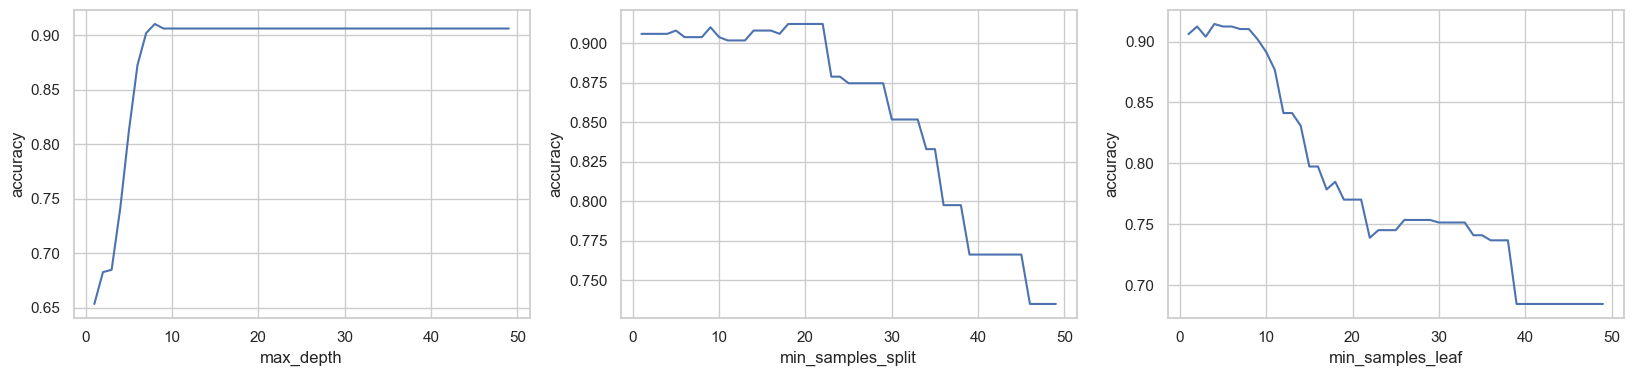

In [16]:
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')

tic_tac_toe['V10'] = (tic_tac_toe['V10'] == 'positive').astype(int)
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(tic_tac_toe[tic_tac_toe.columns[: -1]].to_numpy(), tic_tac_toe[tic_tac_toe.columns[-1]].to_numpy(), test_size=0.5, random_state=42, shuffle=True, stratify=tic_tac_toe['V10'])

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
max_depth_list = []
for max_depth in np.arange(1,50):
    tree = DecisionTree(['categorical'] * X_train.shape[1], max_depth=max_depth)
    tree.fit(X_train, y_train)
    max_depth_list.append(accuracy_score(y_test, tree.predict(X_test)))
plt.plot(range(1, len(max_depth_list) + 1), max_depth_list)
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.subplot(1,3,2)
split_list = []
for min_samples_split in np.arange(1,50):
    tree = DecisionTree(['categorical'] * X_train.shape[1], min_samples_split=min_samples_split)
    tree.fit(X_train, y_train)
    split_list.append(accuracy_score(y_test, tree.predict(X_test)))
plt.plot(range(1, len(split_list) + 1), split_list)
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.subplot(1,3,3)
leaf_list = []
for min_samples_leaf in np.arange(1,50):
    tree = DecisionTree(['categorical'] * X_train.shape[1], min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    leaf_list.append(accuracy_score(y_test, tree.predict(X_test)))
plt.plot(range(1, len(leaf_list) + 1), leaf_list)
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [67]:
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
cars = pd.read_csv('car.data', header=None)
nursery = pd.read_csv('nursery.data', header=None)


mushrooms[0] = (mushrooms[0] == 'p').astype(int)
tic_tac_toe['V10'] = (tic_tac_toe['V10'] == 'positive').astype(int)
cars[6] = ((cars[6] == 'good') | (cars[6] == 'vgood')).astype(int)
nursery[8] = ((nursery[8] == 'very_recom') | (nursery[8] == 'priority') | (nursery[8] == 'spec_prior')).astype(int)


datasets = {'mushrooms':mushrooms, 'tic_tac_toe':tic_tac_toe, 'cars':cars, 'nursery':nursery}
for dataset in datasets:
    datasets[dataset] = datasets[dataset].apply(LabelEncoder().fit_transform)

In [84]:
from collections import defaultdict

df = defaultdict(list)
df['dataset'] = datasets.keys()

methods = ['DT with real types', 'DT with categorical types', 'DT with real type and ohe', 'sklearn DT']
for i, method in enumerate(methods):
    for j, dataset in enumerate(datasets):
        if not j:
            X, y = datasets[dataset][datasets[dataset].columns[1:]].to_numpy(), datasets[dataset][0].to_numpy()
        else:
            X, y = datasets[dataset][datasets[dataset].columns[:-1]].to_numpy(), datasets[dataset][datasets[dataset].columns[-1]].to_numpy()
        if i > 1:
            X = OneHotEncoder(sparse=False).fit_transform(X)
        if i == 0 or i == 2:
            tree = DecisionTree(['real'] * X.shape[1])
        elif i == 1:
            tree = DecisionTree(['categorical'] * X.shape[1])
        else:
            tree = DecisionTreeClassifier()
        df[method].append(cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean())

In [85]:
pd.DataFrame.from_dict(dict(df))

,dataset,DT with real types,DT with categorical types,DT with real type and ohe,sklearn DT
0,mushrooms,0.999261,1.000000,0.999631,0.956443
1,tic_tac_toe,0.467533,0.541458,0.543575,0.817566
2,cars,0.942647,0.967546,0.919495,0.830142
3,nursery,0.999691,0.999846,0.999537,0.999537


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** mushrooms. Тут все алгоритмы, кроме sklearовского показали accuracy~1, видимо потому что последний просто оптимизирован и за скорость расплачивается небольшой ошибкой (ну там прунинг, все дела). Почему остальные 3 сработали одинаково хорошо? Наверное, потому что признаки все были примерно бинарные. Ну то есть у них было мало значений, но даже это мало могло бинаризоваться (ну т.е. например, цвета белый, желтый, черный, синий можно разбить на желтый, белый и синий, черный без потери качества). В этом случае все методы работают, как OHE. И видимо выборка хорошо разделима, поэтому качество 1 почти достижимо. Улучшить качество вряд ли получится (ну у последнего можно, ослабив регуляризацию и прунинг, но скажется на сокрости), разве что попытаться делать быстрее, это, думаю, можно. Случайности тут не особо есть, выборка вполне разделима.

tic-tac-toe. Вообще это очень сложный для разбиения по признакам датасет. Каждая конфигурация игры по сути это отдельный признак. Поэтому скорее всего модель тупо переобучилась. Об этом говорит accuracy~0.5 на рукописных деревьях. Ну и объектов мало было (958). Опять же, везде 3 признака, поэтому OHE и categorical работают одинакого. А вот real работает хуже рандомного. Ну sklearnовские деревья видимо как-то научены не переобучаться, поэтому там 0.80+ получилось. Ну логично, я свои не регуляризировал. Тут очевидно можно улучшить их работу регуляризацией. На сколько можно сделать лучше sklearnа не ясно, так как данных мало, а признаки "одинаковые" по силе, в каком-то смысле симметричные, модели это сложно увидеть. Какая здесь случайность? Тут же тупо все конфигурацие, какая случайность-то лол?

cars. Ну тут весьма комфортный для деревьев датасет. Все признаки упорядочены (low, medium, high), поэтому real и categorical справились хорошо (т.к. их всего 3-4 categorical и real работают примерно одинакого, но первый чуть круче, т.к. признаки все таки категориальные). А вот OHE, мне кажется, переобучился (так как с уникальным набором OHE признаков достаточно мало объектов). Так как данных не так уж и много, а вот плюшек OHE, как я выше объяснил, дает не сильно много, хотя в разы увеличивает кол-во признаков. Думаю, показатели sklearnовских деревьев улучшить уже будет сложно. А вот наши деревья можно опять же зарегуляризовать, особенно OHE. Т.е. глубину тут особо смысла нет ограничивать вроде, а вот min_leaf можно поставить. Тут, конечно, много случайностей, поскольку машины ну ооочень разные, а признаков очень мало, ну и они такие, не прям сильные.

nursery. Здесь у всех алгоритмов аккураси около 1, улучшать некуда. Почему так? Потому что признаки очень сильные. Ясен пень, что если здоровье плохое или социальное положение у семьи проблемное, то скорее всего ребенка не возьмут (или наоборот возьмут, я не социолог, хз, какие там законы). Но факт в том, что каждый признак сам по себе очень сильный и уже он один с неплохим аккураси может разделить выборку. Здесь поскольку выборка разделима случайностей мало.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![Memes with Trees.jpeg](<attachment:Memes with Trees.jpeg>)
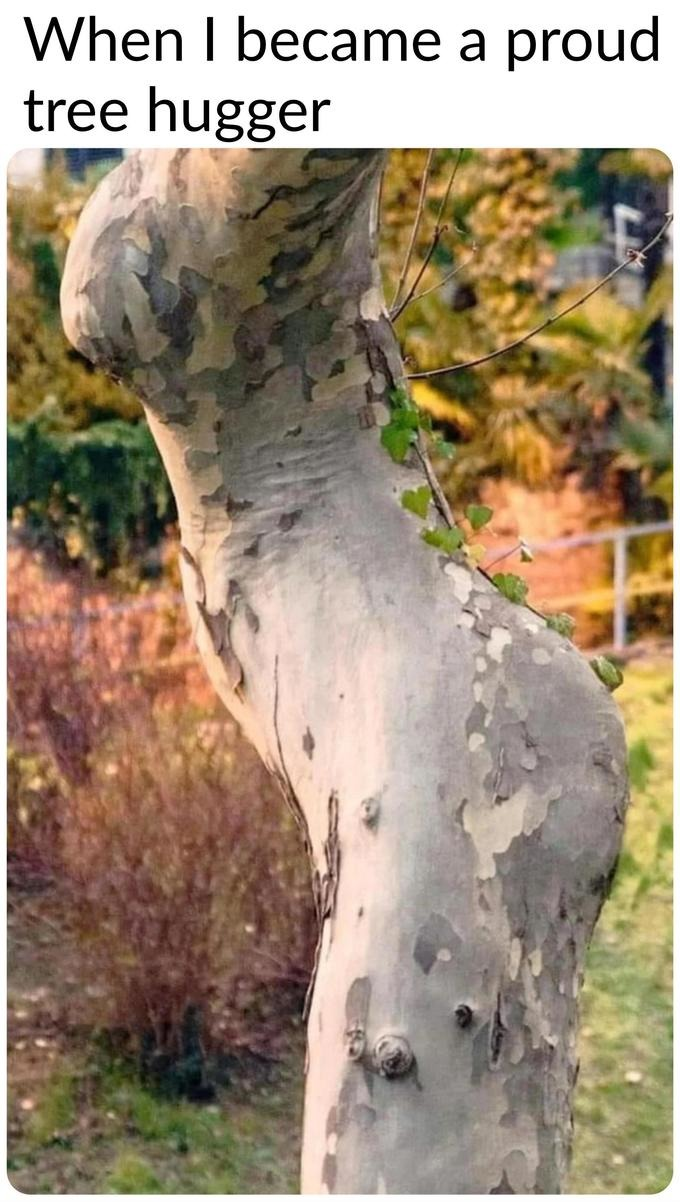
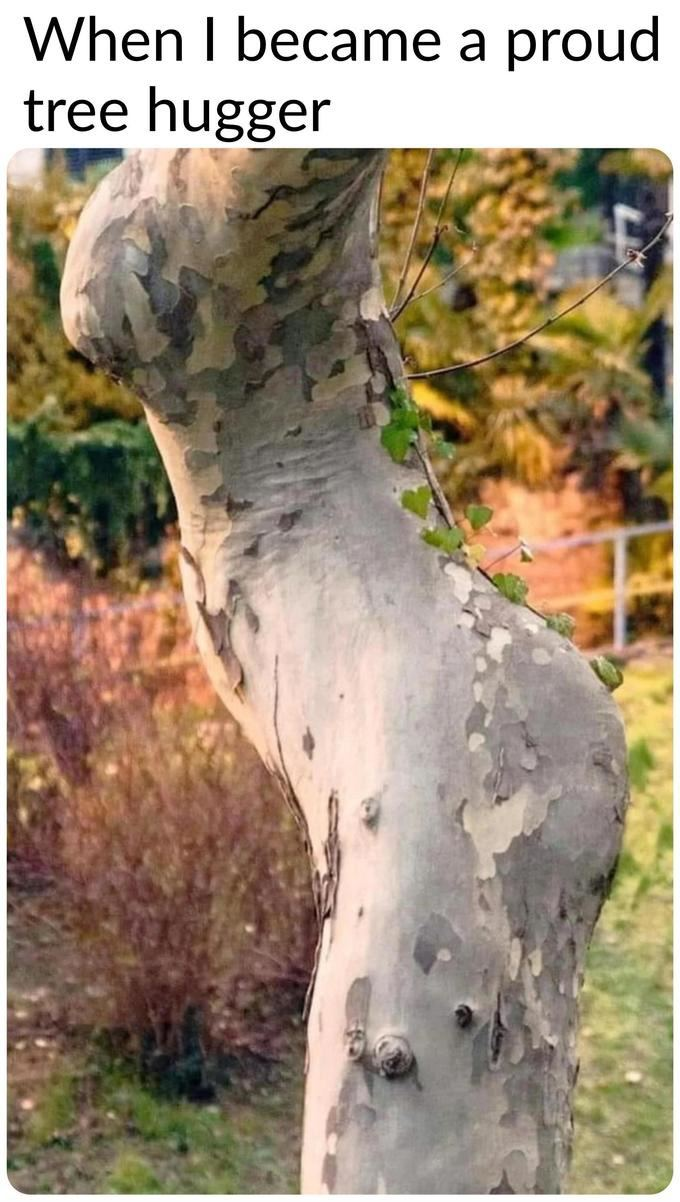